In [87]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import plotly.express as px
import numpy as np 

Importing ownership data

In [88]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_countries_by_home_ownership_rate"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [89]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

In [90]:
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

  Country or Territory Home ownership rate(%) Date of Information
0              Romania                   96.1             2019[2]
1              Hungary                   91.3             2020[2]
2             Slovakia                   90.9             2019[2]
3            Lithuania                   90.3             2019[2]
4                 Cuba                     90             2014[3]


In [91]:
# drop the unwanted columns
data = df.drop(["Date of Information"], axis=1)
# rename columns for ease
data = data.rename(columns={"Country or Territory": "Country"})
data

,Country,Home ownership rate(%)
0,Romania,96.1
1,Hungary,91.3
2,Slovakia,90.9
3,Lithuania,90.3
4,Cuba,90
...,...,...
66,Switzerland,41.6
67,United Arab Emirates,28
68,Nigeria,25
69,Fiji,10


In [92]:
#read donwloaded data 
wealthdta = pd.read_csv('https://raw.githubusercontent.com/ujwalgurung1/ujwalgurung1.github.io/main/project/data/Wealth.csv')

In [93]:
wealthdta

,Country,Indicator,Value
0,Australia,p0p50,0.0616
1,Australia,p90p100,0.5563
2,Australia,p99p100,0.2269
3,Austria,p0p50,0.0315
4,Austria,p90p100,0.6142
...,...,...,...
73,USA,p90p100,0.7067
74,USA,p99p100,0.3487
75,United Kingdom,p0p50,0.0466
76,United Kingdom,p90p100,0.5699


In [94]:
wealthdta['Value'] = wealthdta['Value'] * 100 #we want to turn decimals into percentages

In [95]:
wealthdta

,Country,Indicator,Value
0,Australia,p0p50,6.16
1,Australia,p90p100,55.63
2,Australia,p99p100,22.69
3,Austria,p0p50,3.15
4,Austria,p90p100,61.42
...,...,...,...
73,USA,p90p100,70.67
74,USA,p99p100,34.87
75,United Kingdom,p0p50,4.66
76,United Kingdom,p90p100,56.99


In [96]:
#Merging 2 data sets and renaming columns
merged = pd.merge(wealthdta, data, on='Country', how='left')
merged = merged.rename(columns={"Value": "Share of Net Wealth(%)"})

In [97]:
#Given wealth data has more obersvations and therfore countries we must drop the countries that we do not have data for
merged = merged.dropna()
merged


,Country,Indicator,Share of Net Wealth(%),Home ownership rate(%)
0,Australia,p0p50,6.16,65.5
1,Australia,p90p100,55.63,65.5
2,Australia,p99p100,22.69,65.5
3,Austria,p0p50,3.15,55.3
4,Austria,p90p100,61.42,55.3
...,...,...,...,...
70,Switzerland,p90p100,62.25,41.6
71,Switzerland,p99p100,30.40,41.6
75,United Kingdom,p0p50,4.66,63
76,United Kingdom,p90p100,56.99,63


In [98]:
merged.loc[merged['Indicator'].str.contains('p0p50'), 'Indicator'] = 'Bottom 50%'
merged.loc[merged['Indicator'].str.contains('p90p100'), 'Indicator'] = 'Top 10%'
merged.loc[merged['Indicator'].str.contains('p99p100'), 'Indicator'] = 'Top 1%'

In [99]:
merged['Home ownership rate(%)'] = merged['Home ownership rate(%)'].astype(float)
merged['Share of Net Wealth(%)'] = merged['Share of Net Wealth(%)'].astype(float)

In [100]:
bottom50 = merged[merged['Indicator'].str.contains("Bottom 50%")]
top10 = merged[merged['Indicator'].str.contains("Top 10%")]
top1 = merged[merged['Indicator'].str.contains("Top 1%")]

In [101]:
merged

,Country,Indicator,Share of Net Wealth(%),Home ownership rate(%)
0,Australia,Bottom 50%,6.16,65.5
1,Australia,Top 10%,55.63,65.5
2,Australia,Top 1%,22.69,65.5
3,Austria,Bottom 50%,3.15,55.3
4,Austria,Top 10%,61.42,55.3
...,...,...,...,...
70,Switzerland,Top 10%,62.25,41.6
71,Switzerland,Top 1%,30.40,41.6
75,United Kingdom,Bottom 50%,4.66,63.0
76,United Kingdom,Top 10%,56.99,63.0


Ploting

In [102]:
import plotly.express as px

fig = px.scatter(merged, x="Home ownership rate(%)", y="Share of Net Wealth(%)", color="Country", facet_col="Indicator")
fig.update_layout(showlegend=False)
fig.update_xaxes(matches=None)
fig.update_layout(width=700) 
fig.update_layout(height=500) 

fig.show()
fig.write_html("ShareofWealth.html")

Regression

In [103]:
top1 = top1.dropna()
top10 = top10.dropna()
bottom50 = bottom50.dropna()

In [104]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [105]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)
x = bottom50.dropna()['Home ownership rate(%)']
y = bottom50.dropna()['Share of Net Wealth(%)']


xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [106]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



0.020454927661331168


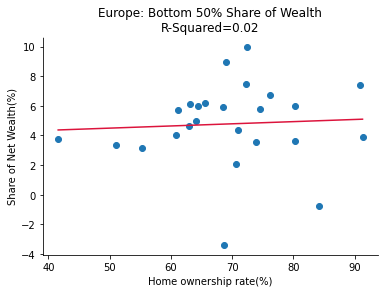

In [107]:
x = bottom50.dropna()['Home ownership rate(%)']
y = bottom50.dropna()['Share of Net Wealth(%)']

poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
ax = plt.gca()


ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('black')

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.title("Europe: Bottom 50% Share of Wealth\nR-Squared=0.02")

plt.xlabel('Home ownership rate(%)')
plt.ylabel('Share of Net Wealth(%)')

poly_model = np.poly1d(np.polyfit(x, y, 3))
print(r2_score(y, poly_model(x)))

plt.savefig('Bottom 50% Share of Wealth.pdf')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



0.2238583919805337


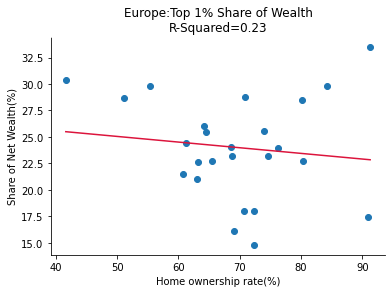

In [108]:
x = top1.dropna()['Home ownership rate(%)']
y = top1.dropna()['Share of Net Wealth(%)']

poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
ax = plt.gca()


ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('black')

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.title("Europe:Top 1% Share of Wealth\nR-Squared=0.23")

plt.xlabel('Home ownership rate(%)')
plt.ylabel('Share of Net Wealth(%)')

poly_model = np.poly1d(np.polyfit(x, y, 3))
print(r2_score(y, poly_model(x)))

plt.savefig('Top 1% Share of Wealth.pdf')

Interactive Plotly

In [109]:
import plotly.express as px

fig = px.scatter(
    top1, x='Home ownership rate(%)', y='Share of Net Wealth(%)', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue',
)


fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [110]:
a = px.get_trendline_results(fig).px_fit_results.iloc[0].rsquared
a

0.01590362996820127

ML Regression

In [111]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

df = bottom50
X = df["Home ownership rate(%)"].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df["Share of Net Wealth(%)"])

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='Home ownership rate(%)', y='Share of Net Wealth(%)', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()